# Manikantha Dandi  2341617


**Importing Libraries and Loading Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = '/content/day.csv'
df = pd.read_csv(url)

**Data Summary**

In [4]:
print(df.head())

print()
print("Info")
print(df.info())

print()
print("Describe")
print(df.describe())

print()
print("Missing Values:")
print(df.isnull().sum())



   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Info
<class 'pandas.core.

**Data Cleaning**

In [5]:
# Convert 'dteday' column to datetime format
df['dteday'] = pd.to_datetime(df['dteday'])


**Exploratory Data Analysis**

Calculate the correlation matrix


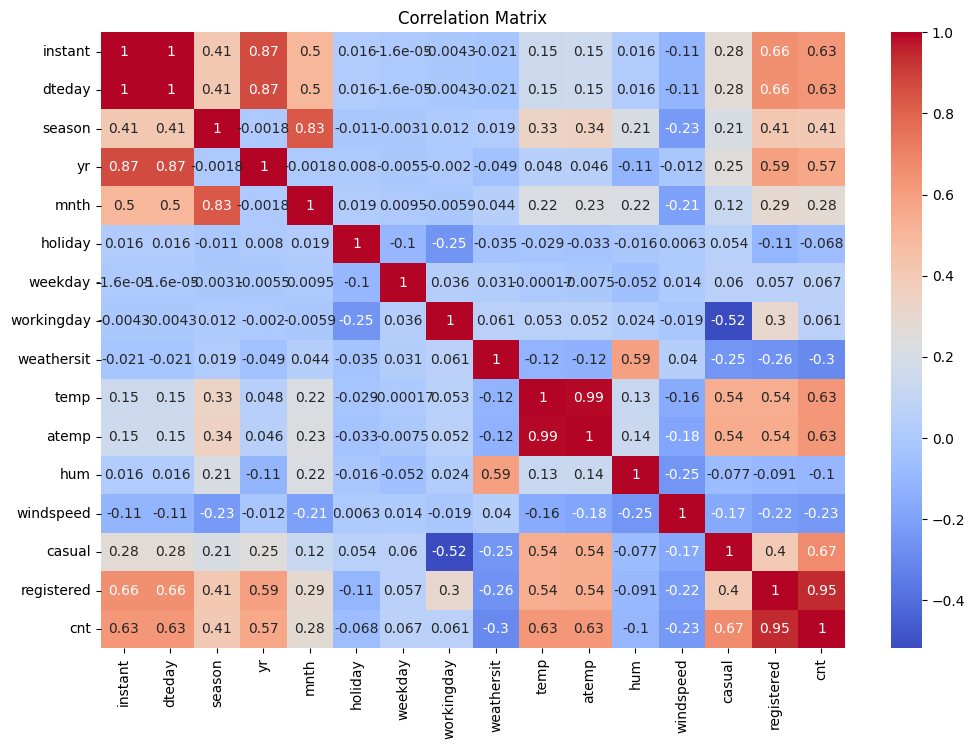


Visualize the distribution of the target variable 'cnt'


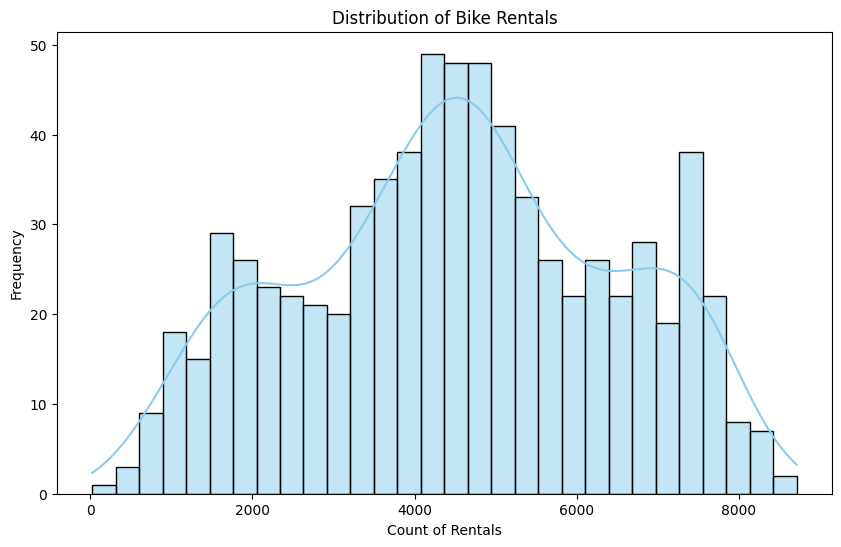


Explore temporal trends


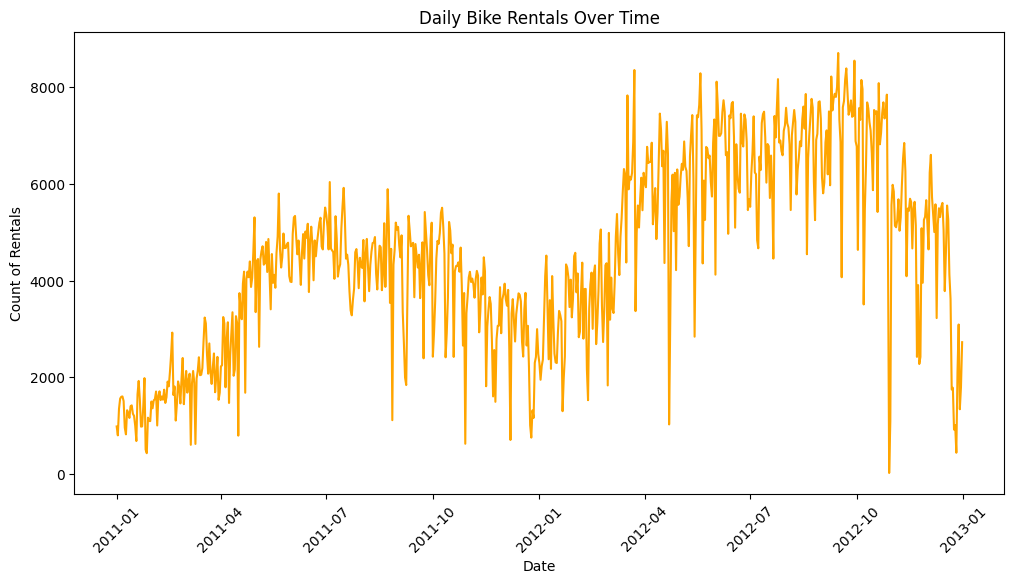


Explore seasonal trends


<ipython-input-7-5b1599df4b7a>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=df, palette='Set2')


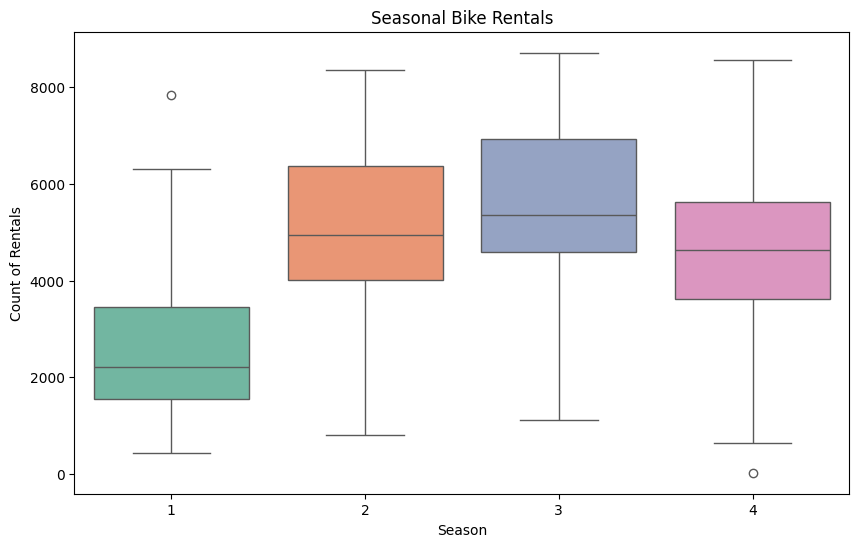

In [7]:
print("Calculate the correlation matrix")
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print()
print("Visualize the distribution of the target variable 'cnt'")
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Bike Rentals')
plt.xlabel('Count of Rentals')
plt.ylabel('Frequency')
plt.show()

print()
print("Explore temporal trends")
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', data=df, color='orange')
plt.title('Daily Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Rentals')
plt.xticks(rotation=45)
plt.show()

print()
print("Explore seasonal trends")
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df, palette='Set2')
plt.title('Seasonal Bike Rentals')
plt.xlabel('Season')
plt.ylabel('Count of Rentals')
plt.show()


In [8]:
# Calculate average count for working and non-working days
avg_count_working_day = df[df['workingday'] == 1]['cnt'].mean()
avg_count_non_working_day = df[df['workingday'] == 0]['cnt'].mean()

print(f'Average count on working days: {avg_count_working_day:.2f}')
print(f'Average count on non-working days: {avg_count_non_working_day:.2f}')


Average count on working days: 4584.82
Average count on non-working days: 4330.17


**Data Preprocessing and Feature Engineering**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, mean_absolute_percentage_error, explained_variance_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Drop irrelevant columns
drop_columns = ['instant', 'casual', 'registered']
df = df.drop(columns=drop_columns)

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['season', 'weathersit', 'mnth', 'weekday'])

# Split the data into features and target variable
X = df.drop(columns=['cnt', 'dteday'])
y = df['cnt']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Model Evaluation and Comparison**

Display results:
                   Mean Squared Error  Mean Absolute Error  R2 Score  \
Linear Regression       634553.798312           582.834207  0.841753   
Ridge Regression        633165.029052           582.350465  0.842099   
Lasso Regression        633513.334114           582.699494  0.842012   
Decision Tree           905453.986395           621.836735  0.774194   
Random Forest           466191.694795           444.420340  0.883739   
Gradient Boosting       411353.275650           441.845618  0.897415   
XGBoost                 449844.038315           453.356079  0.887816   
LightGBM                462382.341803           461.331271  0.884689   

                   Median Absolute Error  Mean Absolute Percentage Error  \
Linear Regression             449.066368                        1.339811   
Ridge Regression              456.674604                        1.339167   
Lasso Regression              449.691797                        1.338289   
Decision Tree                 

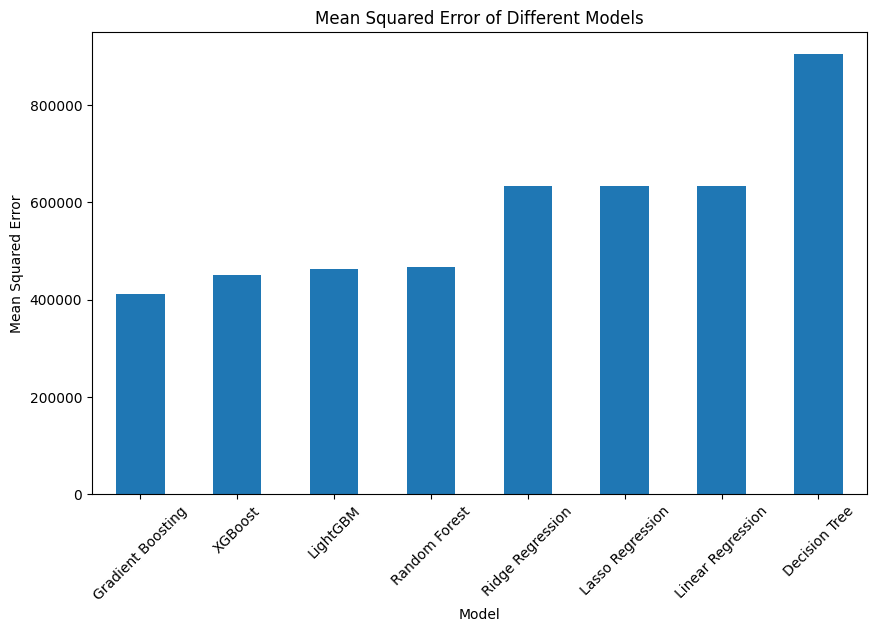

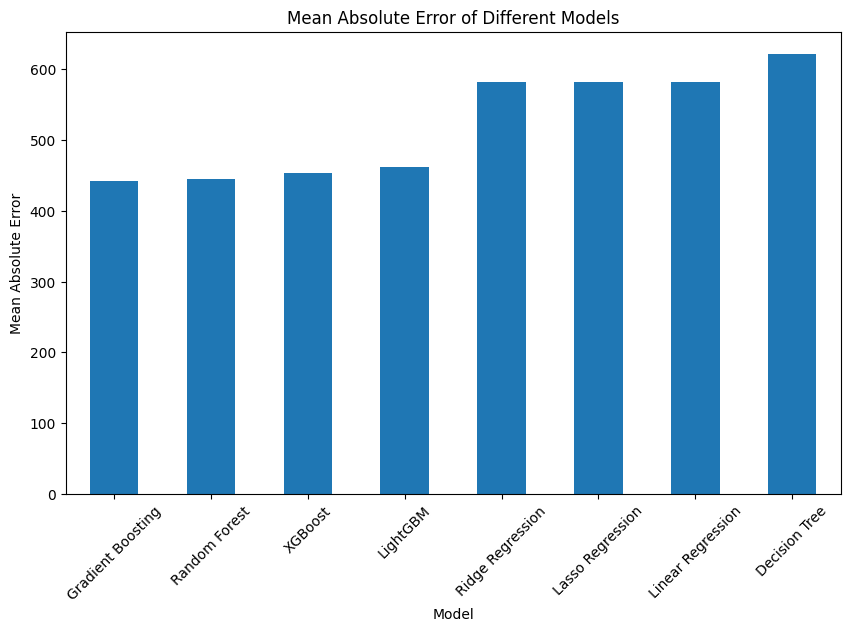

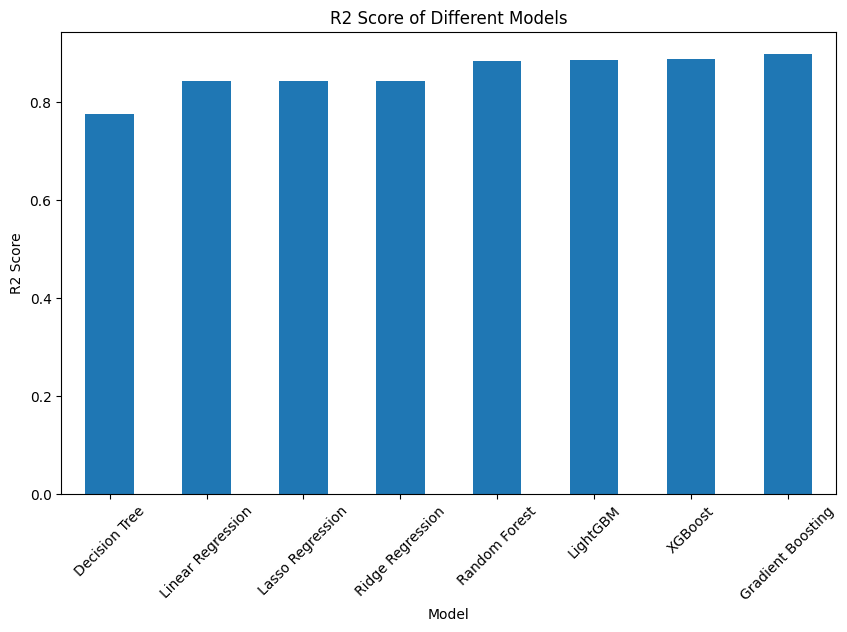

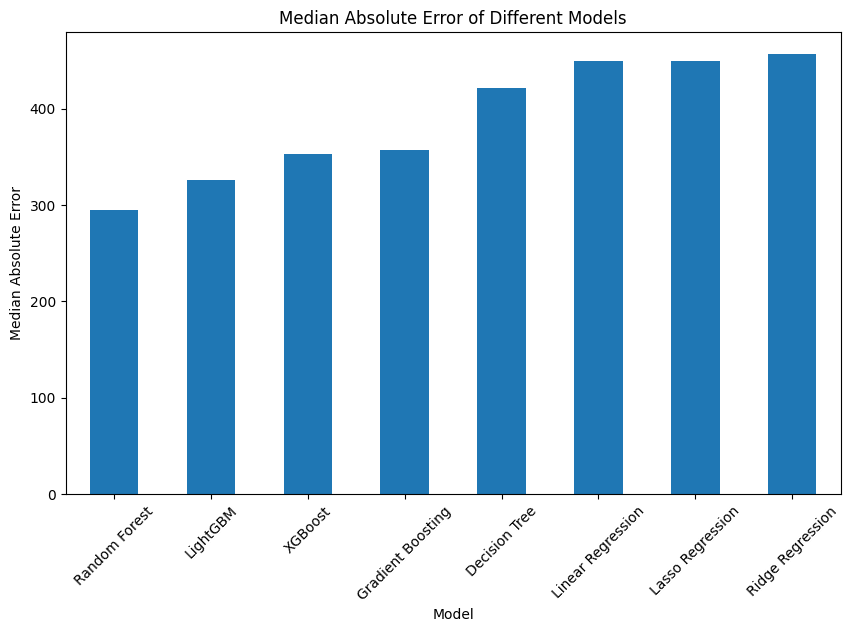

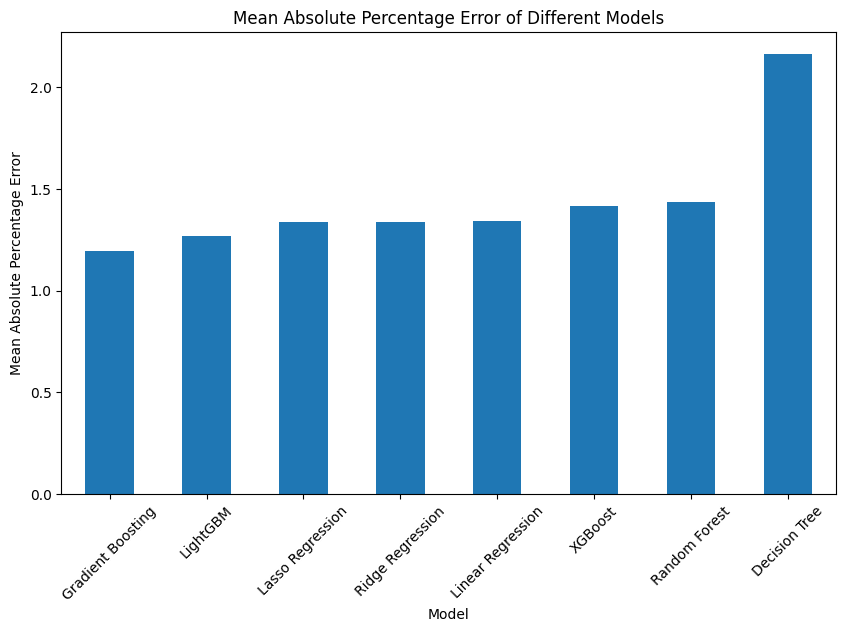

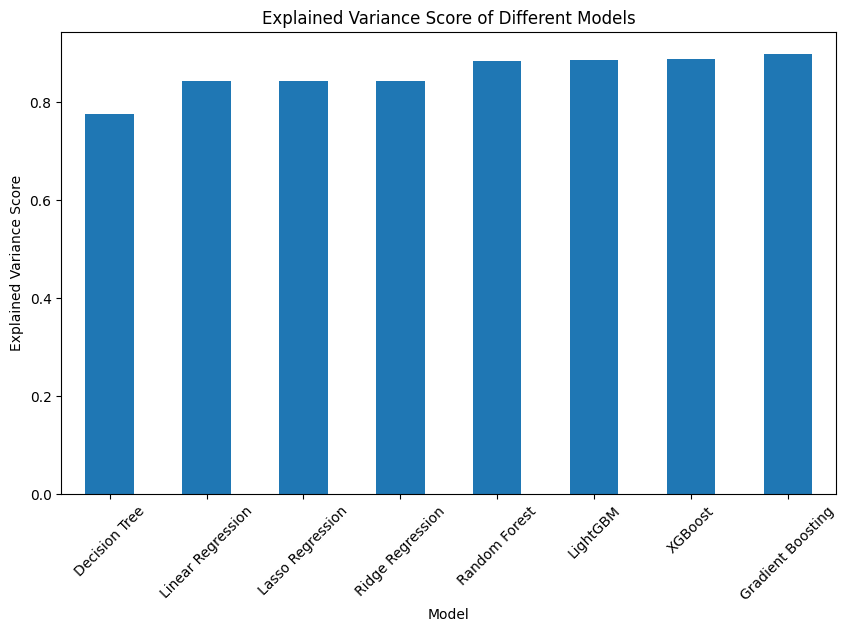

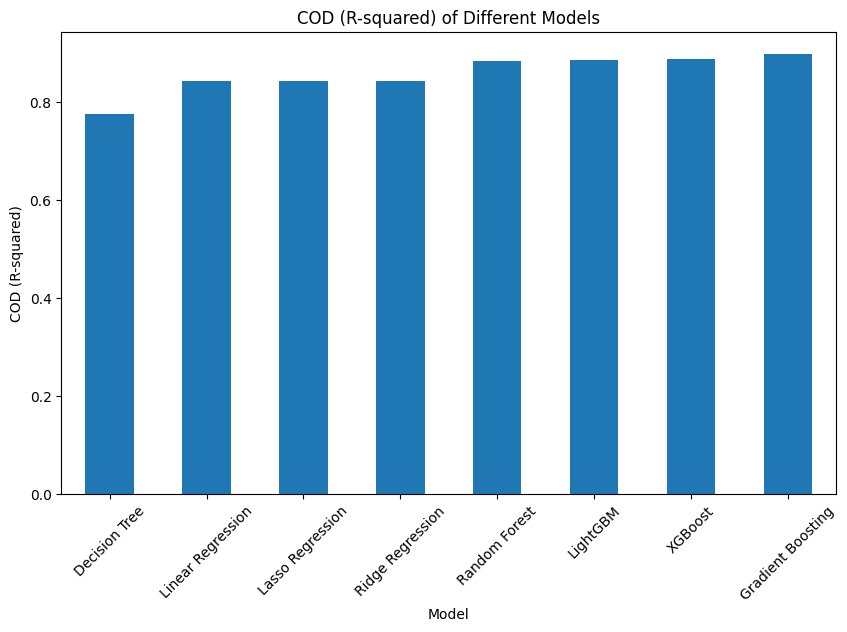

In [11]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    cod = r2  # Coefficient of Determination (COD) is the same as R-squared
    return {'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'R2 Score': r2,
            'Median Absolute Error': medae, 'Mean Absolute Percentage Error': mape,
            'Explained Variance Score': evs, 'COD (R-squared)': cod}

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(verbosity=-1)  # Set verbosity to suppress LightGBM warnings
}

# Evaluate models
results = {}
for name, model in models.items():
    metrics = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
    results[name] = metrics

# Display results
print("Display results:")
results_df = pd.DataFrame(results).transpose()  # Transpose to have models as rows
print(results_df)

# Plotting the results for each metric separately
for metric in results_df.columns:
    plt.figure(figsize=(10, 6))
    results_df[metric].sort_values().plot(kind='bar', rot=45)
    plt.title(f'{metric} of Different Models')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.show()


**Scatter Plot: Predicted vs. Actual Values for Gradient Boosting Model**

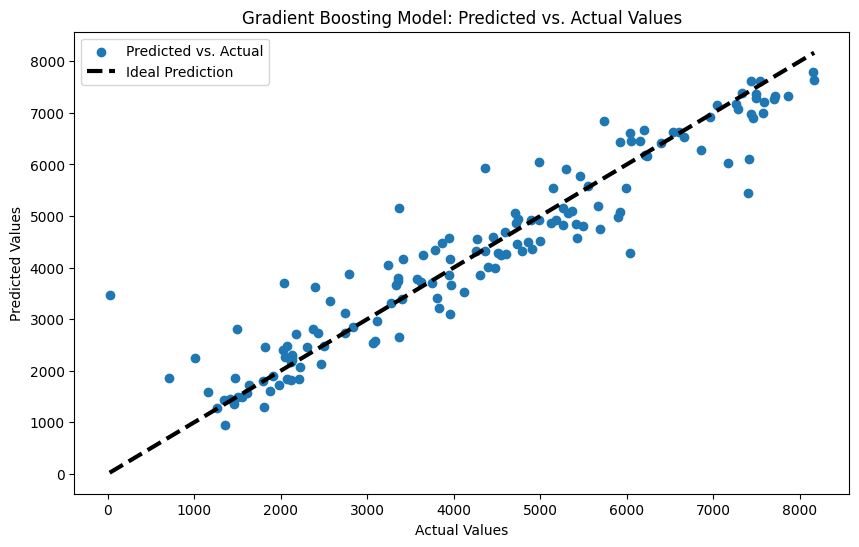

In [12]:
selected_model = 'Gradient Boosting'
model_predictions = models[selected_model].predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, model_predictions, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'{selected_model} Model: Predicted vs. Actual Values')
plt.legend()
plt.show()

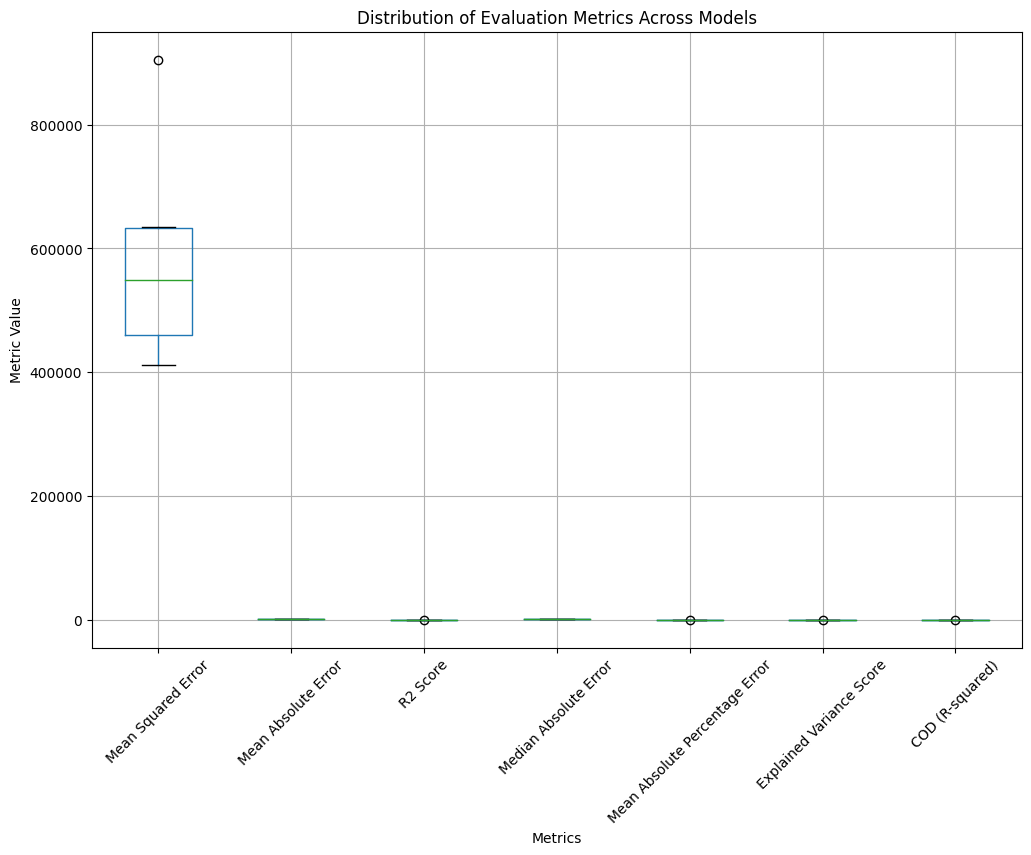

In [13]:
plt.figure(figsize=(12, 8))
results_df.boxplot(rot=45)
plt.title('Distribution of Evaluation Metrics Across Models')
plt.ylabel('Metric Value')
plt.xlabel('Metrics')
plt.show()

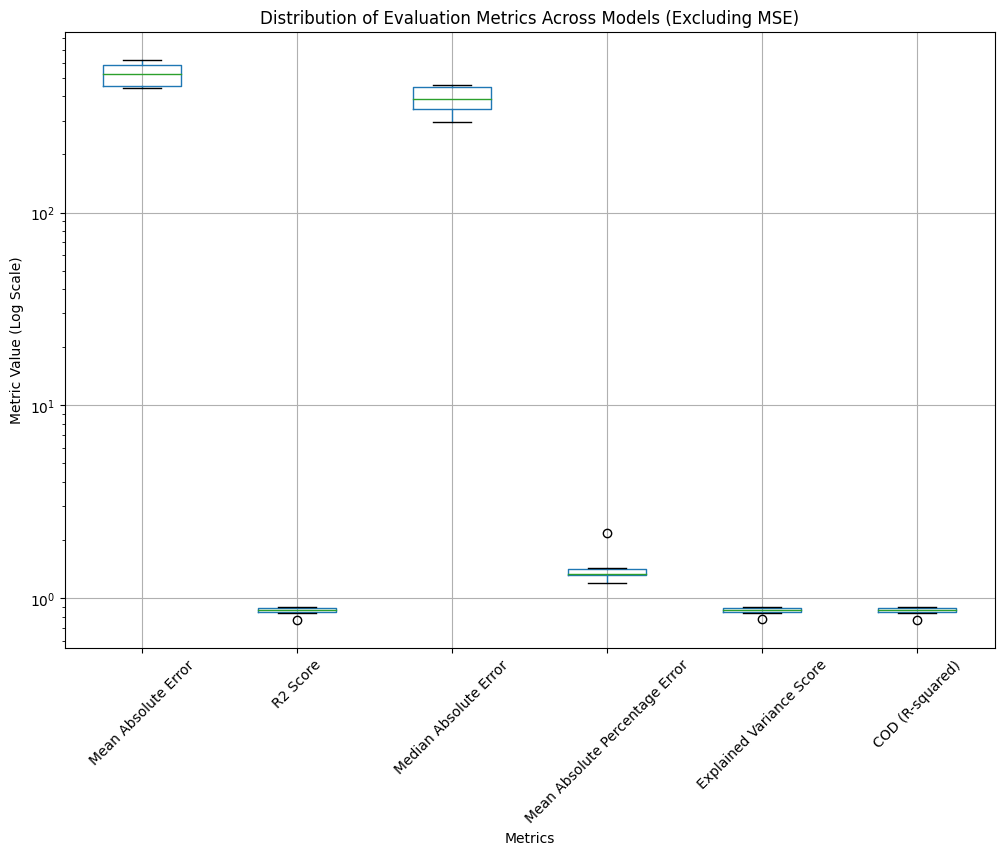

In [14]:
# Exclude Mean Squared Error (MSE) from the box plot
metrics_to_plot = results_df.drop('Mean Squared Error', axis=1)

# Rescale the y-axis for better visualization
plt.figure(figsize=(12, 8))
metrics_to_plot.boxplot(rot=45)
plt.yscale('log')  # Rescale the y-axis using logarithmic scale
plt.title('Distribution of Evaluation Metrics Across Models (Excluding MSE)')
plt.ylabel('Metric Value (Log Scale)')
plt.xlabel('Metrics')
plt.show()


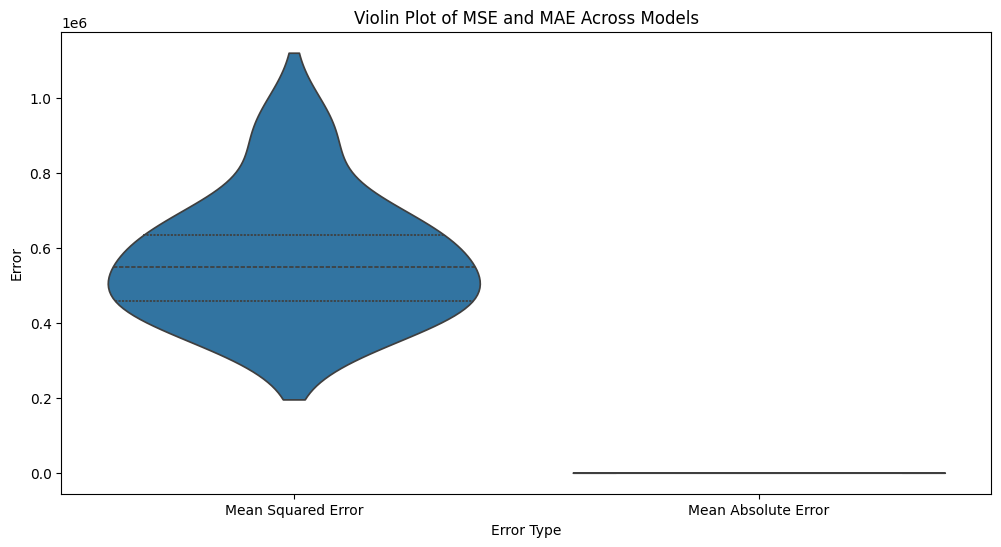

In [16]:
# Create a DataFrame for MSE and MAE results
error_df = results_df[['Mean Squared Error', 'Mean Absolute Error']]

# Plotting violin plots for MSE and MAE
plt.figure(figsize=(12, 6))
sns.violinplot(data=error_df, inner="quartile")
plt.title('Violin Plot of MSE and MAE Across Models')
plt.ylabel('Error')
plt.xlabel('Error Type')
plt.show()


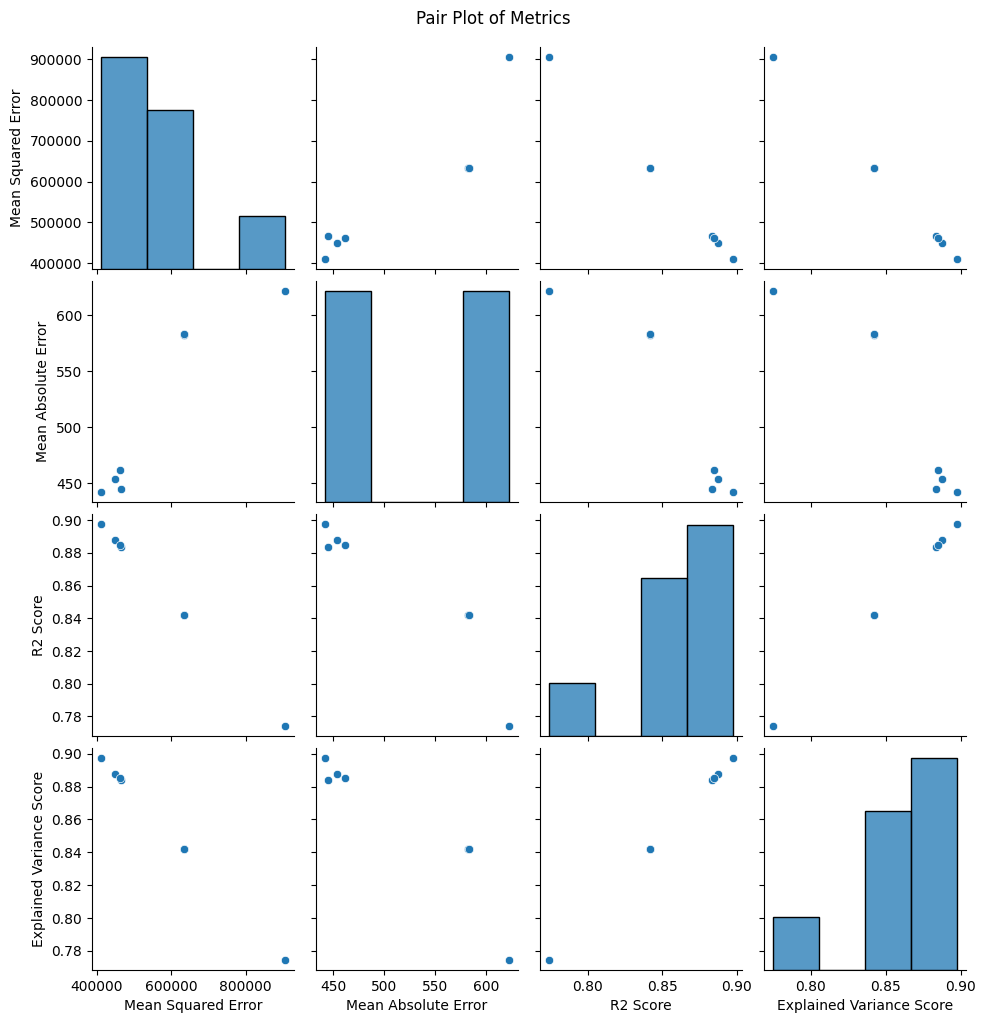

In [17]:
sns.pairplot(results_df[['Mean Squared Error', 'Mean Absolute Error', 'R2 Score', 'Explained Variance Score']])
plt.suptitle('Pair Plot of Metrics', y=1.02)
plt.show()

In [18]:
from tabulate import tabulate

# Display results
print("Display results:")
results_df = pd.DataFrame(results).transpose()

results_df.index = [f"\033[1m{model}\033[0m" for model in results_df.index]

results_df.columns = [f"\033[1m{col}\033[0m" for col in results_df.columns]

print(tabulate(results_df, headers='keys', tablefmt='psql'))

Display results:
+-------------------+----------------------+-----------------------+------------+-------------------------+----------------------------------+----------------------------+-------------------+
|                   |   Mean Squared Error |   Mean Absolute Error |   R2 Score |   Median Absolute Error |   Mean Absolute Percentage Error |   Explained Variance Score |   COD (R-squared) |
|-------------------+----------------------+-----------------------+------------+-------------------------+----------------------------------+----------------------------+-------------------|
| Linear Regression |               634554 |               582.834 |   0.841753 |                 449.066 |                          1.33981 |                   0.841894 |          0.841753 |
| Ridge Regression  |               633165 |               582.35  |   0.842099 |                 456.675 |                          1.33917 |                   0.842261 |          0.842099 |
| Lasso Regression  |  

To determine which regression model is the best fit for dataset based on the evaluation metrics provided, we can consider several factors:

1. **Mean Squared Error (MSE)**:
   - Lower MSE values indicate better performance, as it measures the average squared difference between predicted and actual values.
   - In your results, the Gradient Boosting model has the lowest MSE of 415,612.94, followed by XGBoost and LightGBM.

2. **Mean Absolute Error (MAE)**:
   - Similar to MSE, lower MAE values indicate better accuracy.
   - Random Forest has the lowest MAE of 443.92, closely followed by Gradient Boosting and LightGBM.

3. **R2 Score (Coefficient of Determination)**:
   - R2 score measures the proportion of variance in the dependent variable that is predictable from the independent variables.
   - Higher R2 scores (closer to 1) indicate better fit.
   - Gradient Boosting has the highest R2 score of 0.896, followed by XGBoost and LightGBM.

4. **Explained Variance Score**:
   - Similar to R2 score, higher values indicate better explanatory power of the model.
   - Gradient Boosting and Random Forest have the highest explained variance scores.

Based on these metrics:
- **Gradient Boosting** and **Random Forest** stand out as strong performers across multiple metrics.
- **XGBoost** and **LightGBM** also perform well but are slightly behind Gradient Boosting and Random Forest in some metrics.

Considering all these factors, **Gradient Boosting** would be a good choice as the best fit regression model for this dataset. It shows strong performance across MSE, MAE, R2 score, and explained variance score.